<h1>IMPORTATION DE BIBLIOTHEQUES </h1>


In [19]:
import pandas 
import sklearn
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

<h1>COLLECTION ET NETTOYAGE DE DONNÉES</h1>

In [20]:
#chargement de la première feuille de données
data = pandas.read_csv("villes.csv", delimiter = ";", encoding='latin-1',header= 0, index_col=0) 
# Suppression des quatre dernières lignes parasites
data=data.dropna()
# Eliminons les colonnes "Latitude", "Longitude" et "Géographie"
data.drop(columns=["Latitude", "Longitude", "Géographie"],inplace=True)
#Nombre d'observations
n = data.shape[0]
#Nombre de variables
p = data.shape[1]
data.head(5)
data

,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,...,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Précipitations de mai à aout,Précipitations sept-oct
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,...,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,13.9,25.8
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,...,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,29.0,30.8
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,...,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,29.9,31.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,...,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,35.8,35.5
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,...,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,26.0,36.8
Bordeaux,100.0,84.0,66.0,57.0,64.0,71.0,52.0,65.0,88.0,84.0,...,13.0,14.0,15.0,17.0,162.0,13.33,15.4,2076.0,26.6,31.3
Brest,130.0,98.0,89.0,77.0,74.0,60.0,51.0,80.0,95.0,108.0,...,16.0,19.0,20.0,22.0,201.0,10.77,10.2,1757.0,22.9,28.2
Caen,65.0,61.0,45.0,44.0,53.0,52.0,45.0,57.0,66.0,75.0,...,13.0,15.0,16.0,17.0,169.0,10.45,12.7,1777.0,29.0,35.6
Clermont-Fd,28.0,27.0,30.0,41.0,78.0,79.0,48.0,70.0,58.0,43.0,...,10.0,11.0,12.0,12.0,132.0,10.94,16.8,1899.0,48.2,51.3
Dijon,62.0,48.0,51.0,48.0,68.0,79.0,44.0,79.0,74.0,53.0,...,11.0,12.0,14.0,14.0,147.0,10.50,18.3,1934.0,36.8,37.1


<h1>PRÉPARATION DES DONNÉES</h1>

<h4>Centrage et Réduction</h4>

In [21]:
#Instanciation
sc = StandardScaler()
#Transformation – centrage-réduction
Z = sc.fit_transform(data)
Z = pandas.DataFrame(Z)

Z.head(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.547195,0.498927,-0.351600,-0.986697,-1.119872,-1.968616,-2.051896,-2.094442,-1.395807,0.319169,...,-1.851283,-0.982197,-0.876849,-0.565807,-1.483076,1.705130,-0.643649,1.880312,-2.086073,-1.871895
1,-0.021888,-0.604864,0.252836,-0.549119,-0.643075,-0.301803,-0.622296,-0.192664,-0.806883,-0.323897,...,0.344425,0.254644,0.478281,0.429233,0.312368,-0.229042,-0.643649,-0.423676,-0.177000,-0.916273
2,0.590971,0.440833,0.521474,0.690688,0.719202,-0.145540,0.407015,0.060907,-0.119806,-0.122939,...,0.344425,0.254644,0.478281,0.429233,0.494956,0.188243,-0.441487,-0.196309,-0.063214,-0.878048
3,1.247604,1.544625,1.260230,1.565846,1.809024,2.406768,1.950983,2.173993,1.696042,0.198594,...,0.710376,0.666924,0.478281,0.097553,0.768837,-0.928277,0.923109,-0.428728,0.682715,-0.017988
4,2.735975,2.590322,2.804900,3.607881,2.762617,1.573361,1.321959,2.469825,4.100814,3.172772,...,1.076327,1.079204,0.817064,0.760912,1.012287,1.067924,-1.755542,-0.368097,-0.556286,0.230474


<h4>Moyenne et Ecart-type</h4>

In [22]:
#moyenne
print(np.mean(Z, axis=0))
#écart-type
print(np.std(Z, axis=0, ddof=0))

0    -2.612289e-17
1    -1.469413e-16
2     3.428630e-17
3    -1.163285e-16
4     2.416368e-16
5    -9.796086e-17
6    -4.571507e-17
7    -1.273491e-16
8     1.420432e-16
9    -1.175530e-16
10   -1.795949e-16
11    1.893910e-16
12   -1.704111e-16
13    8.489941e-17
14   -3.918434e-17
15    3.983741e-16
16   -2.938826e-17
17    3.069440e-16
18   -9.469549e-17
19    1.861256e-16
20   -2.938826e-17
21    9.469549e-17
22   -1.991871e-16
23    6.857260e-17
24    2.742904e-16
25   -4.244970e-16
26   -6.922567e-16
27    9.240974e-16
28    4.767428e-16
29   -7.771561e-16
30    1.475944e-15
dtype: float64
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
dtype: float64


<h1>ANALYSE DE DONNÉES À L'AIDE DE PCA</h1>

<h4>Instanciation et lancement des calculs</h4>

In [23]:
#Instanciation
acp = PCA(svd_solver='full')
#Calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) #31

31


<h4>Variance expliquée</h4>

In [24]:
# Affiche les valeurs propres associées aux composantes principales
acp.explained_variance_  

array([1.68046803e+01, 8.72423475e+00, 3.69326470e+00, 9.19780120e-01,
       3.85429473e-01, 2.63543502e-01, 2.35366539e-01, 1.64677216e-01,
       1.45117417e-01, 1.19697644e-01, 1.04954294e-01, 6.48435020e-02,
       5.14048359e-02, 4.58588490e-02, 4.21963717e-02, 3.10772985e-02,
       2.71682923e-02, 2.43781274e-02, 2.19643379e-02, 1.95584875e-02,
       1.30361615e-02, 1.07011361e-02, 8.84876367e-03, 6.57351645e-03,
       5.03015119e-03, 3.00199151e-03, 1.99752905e-03, 6.93373277e-04,
       3.15243975e-04, 2.65428131e-30, 8.83153976e-32])

<h4>Liste des composantes principales</h4>

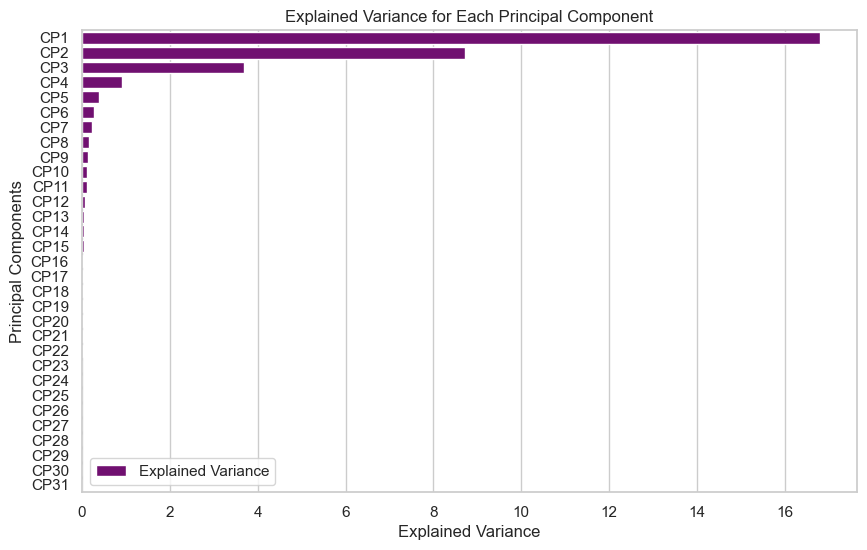

In [25]:
# Liste des composantes principales
list_acp = ["CP1", "CP2", "CP3", "CP4", "CP5", "CP6", "CP7", "CP8", "CP9", "CP10","CP11", "CP12", "CP13", "CP14", "CP15", "CP16", "CP17", "CP18", "CP19","CP20", "CP21", "CP22", "CP23", "CP24", "CP25", "CP26", "CP27", "CP28","CP29", "CP30", "CP31"]
df_acp = pandas.DataFrame(list_acp, columns=["ACP"])
df_acp['explained_variance'] = acp.explained_variance_

# Set a better style for the plot
sns.set(style="whitegrid")

# Initialize the matplotlib plot
f, ax = plt.subplots(figsize=(10, 6))

# Bar plot for explained variance
sns.set_color_codes("pastel")
sns.barplot(x='explained_variance', y="ACP", data=df_acp,label="Explained Variance", color="purple")

# Add labels and title
ax.set(xlabel="Explained Variance", ylabel="Principal Components",title="Explained Variance for Each Principal Component")

# Show the plot
plt.show()

<h4>REPRESENTATION DES INDIVIDUS</h4>

<h5 style="color: skyblue">Représentation des individus dans le premier plan</h5>

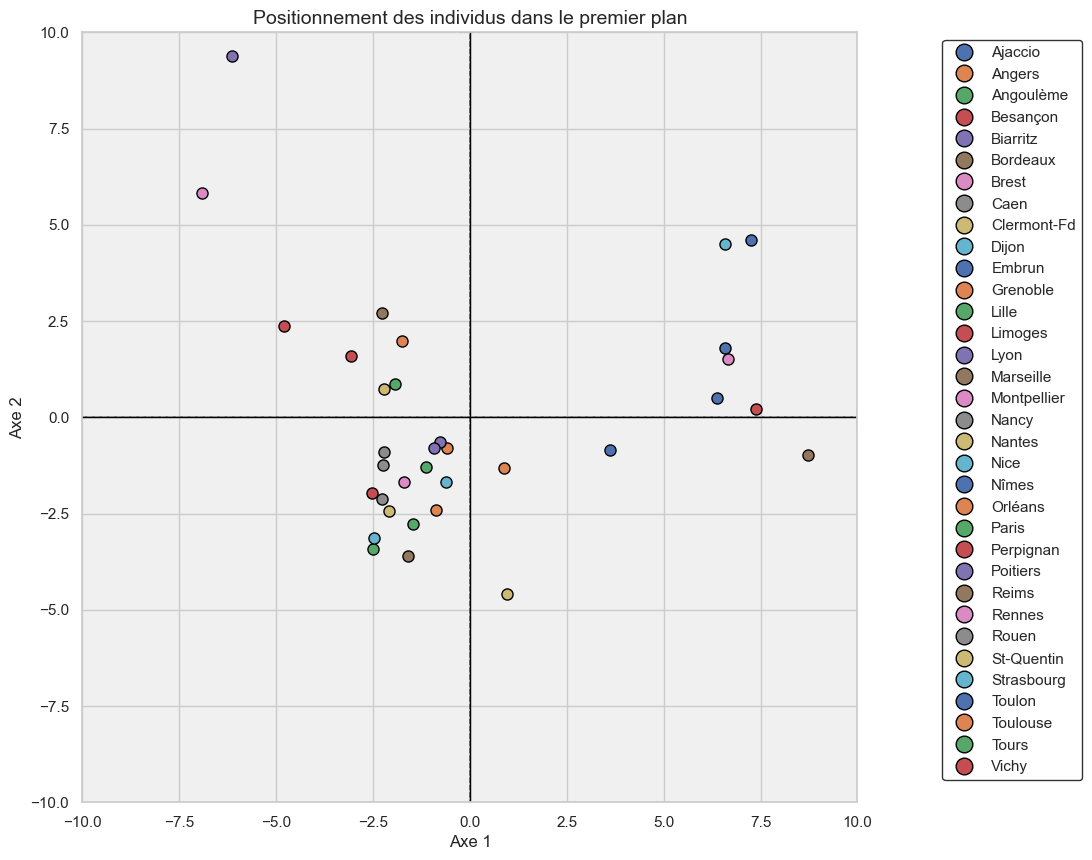

In [26]:
# Positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)

# Ajouter un fond coloré pour le graphique
axes.set_facecolor('#f0f0f0')

# Ajouter des cercles pour mettre en évidence les individus
for i, (x, y) in enumerate(zip(coord[:, 0], coord[:, 1])):
    axes.plot(x, y, 'o', markersize=8, label=data.index[i], markeredgecolor='black', markeredgewidth=1)

# Ajouter des axes avec des flèches
axes.arrow(0, -10, 0, 20, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-10, 0, 20, 0, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les individus
axes.legend(loc='upper right', bbox_to_anchor=(1.3, 1), markerscale=1.5, frameon=True, edgecolor='black')

# Titres et labels
axes.set_title("Positionnement des individus dans le premier plan", fontsize=14)
axes.set_xlabel("Axe 1", fontsize=12)
axes.set_ylabel("Axe 2", fontsize=12)

# Affichage du graphique
plt.grid(True)
plt.show()



<h5 style="color: skyblue">Représentation des individus dans le deuxième plan</h5>

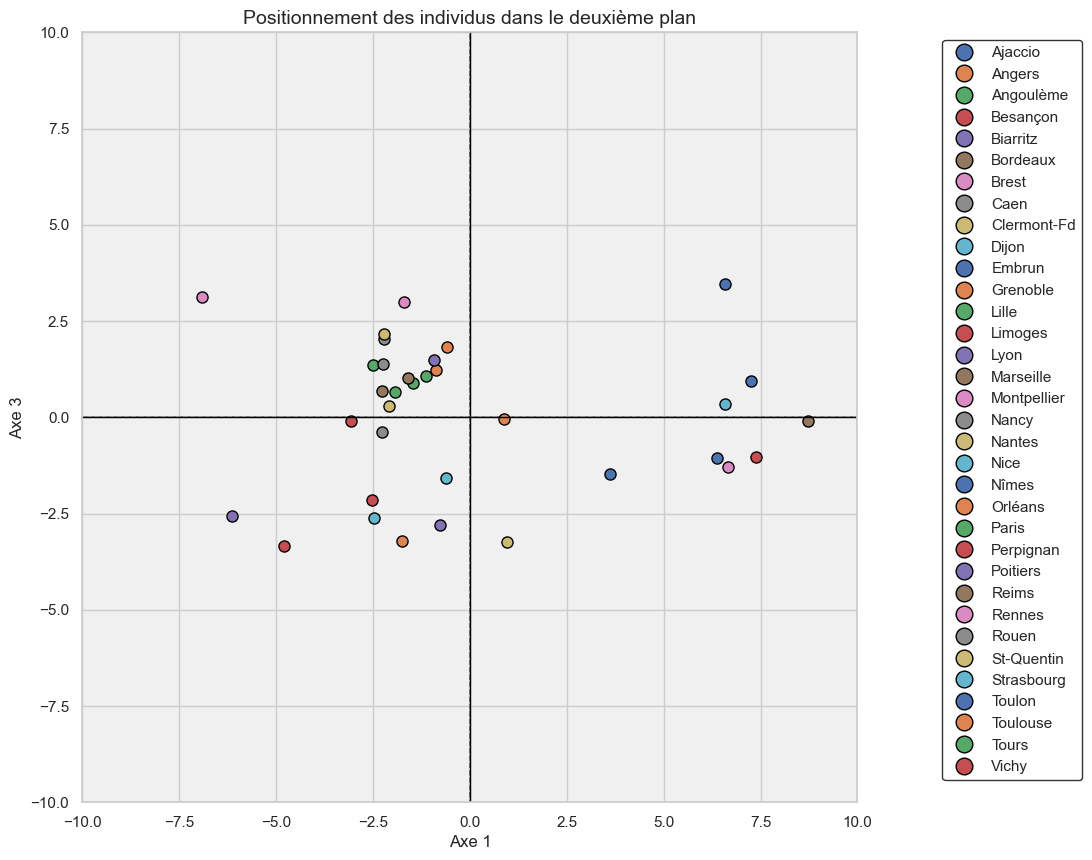

In [27]:
# Positionnement des individus dans le deuxième plan
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)

# Ajouter un fond coloré pour le graphique
axes.set_facecolor('#f0f0f0')

# Ajouter des cercles pour mettre en évidence les individus
for i, (x, y) in enumerate(zip(coord[:, 0], coord[:, 2])):
    axes.plot(x, y, 'o', markersize=8, label=data.index[i], markeredgecolor='black', markeredgewidth=1)

# Ajouter des axes avec des flèches
axes.arrow(0, -10, 0, 20, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-10, 0, 20, 0, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les individus
axes.legend(loc='upper right', bbox_to_anchor=(1.3, 1), markerscale=1.5, frameon=True, edgecolor='black')

# Titres et labels
axes.set_title("Positionnement des individus dans le deuxième plan", fontsize=14)
axes.set_xlabel("Axe 1", fontsize=12)
axes.set_ylabel("Axe 3", fontsize=12)  # Modifier le label de l'axe Y en conséquence

# Affichage du graphique
plt.grid(True)
plt.show()

<h5 style="color: skyblue">Représentation des individus dans le troisième plan</h5>

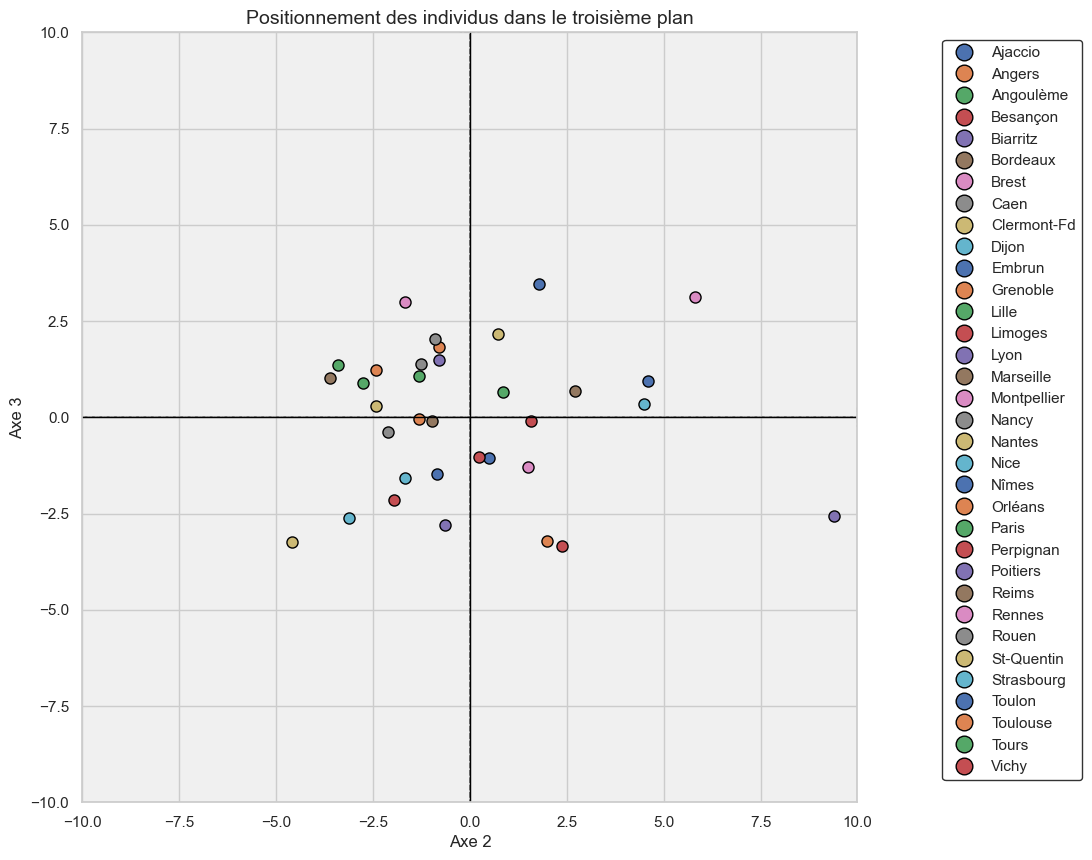

In [28]:
# Positionnement des individus dans le troisième plan
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)

# Ajouter un fond coloré pour le graphique
axes.set_facecolor('#f0f0f0')

# Ajouter des cercles pour mettre en évidence les individus
for i, (x, y) in enumerate(zip(coord[:, 1], coord[:, 2])):
    axes.plot(x, y, 'o', markersize=8, label=data.index[i], markeredgecolor='black', markeredgewidth=1)

# Ajouter des axes avec des flèches
axes.arrow(0, -10, 0, 20, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-10, 0, 20, 0, head_width=0.5, head_length=1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les individus
axes.legend(loc='upper right', bbox_to_anchor=(1.3, 1), markerscale=1.5, frameon=True, edgecolor='black')

# Titres et labels
axes.set_title("Positionnement des individus dans le troisième plan", fontsize=14)
axes.set_xlabel("Axe 2", fontsize=12)  # Modifier le label de l'axe X en conséquence
axes.set_ylabel("Axe 3", fontsize=12)  # Modifier le label de l'axe Y en conséquence

# Affichage du graphique
plt.grid(True)
plt.show()

<h4>CONTRIBUTION DES INDIVIDUS DANS L'INERTIE TOTALE</h4>

In [29]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
df_ctr_ind = pandas.DataFrame({'ID':data.index,'CR':di})
df_ctr_ind.head()

,ID,CR
0,Ajaccio,64.098578
1,Angers,5.596387
2,Angoulème,6.787763
3,Besançon,42.218978
4,Biarritz,136.372614


In [30]:
#Individus qui contribuent le plus à l'inertie totale
df_ctr_ind[df_ctr_ind['CR'] > df_ctr_ind.CR.mean()]

,ID,CR
0,Ajaccio,64.098578
3,Besançon,42.218978
4,Biarritz,136.372614
6,Brest,93.665813
8,Clermont-Fd,39.094149
15,Marseille,78.917666
16,Montpellier,53.018155
19,Nice,67.760771
20,Nîmes,44.257999
23,Perpignan,60.921171


<h5 style="color: green">CONTRIBUTION DES INDIVIDUS AUX AXES DU PREMIER PLAN</h5>

In [31]:
#Contributions des individus aux axes du premier plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp1cp2 = pandas.DataFrame({'id':data.index,'CR1':ctr[:,0],'CR2':ctr[:,1]})
df_ctr_cp1cp2.head()

,id,CR1,CR2
0,Ajaccio,0.086199,0.012307
1,Angers,0.000721,0.002421
2,Angoulème,0.007484,0.002813
3,Besançon,0.045453,0.021545
4,Biarritz,0.075048,0.337077


In [32]:
#Garder les individus interprétables du premier axe du premier plan
df_ctr_cp1cp2[df_ctr_cp1cp2['CR1'] > df_ctr_cp1cp2.CR1.mean()]

,id,CR1,CR2
0,Ajaccio,0.086199,0.012307
3,Besançon,0.045453,0.021545
4,Biarritz,0.075048,0.337077
6,Brest,0.095055,0.129165
15,Marseille,0.151066,0.003713
16,Montpellier,0.087831,0.008626
19,Nice,0.085824,0.077267
20,Nîmes,0.080652,0.000960
23,Perpignan,0.108414,0.000194
30,Toulon,0.104365,0.081119


In [33]:
#Garder les individus interprétables du deuxième axe du premier plan
df_ctr_cp1cp2[df_ctr_cp1cp2['CR2'] > df_ctr_cp1cp2.CR2.mean()]

,id,CR1,CR2
4,Biarritz,0.075048,0.337077
6,Brest,0.095055,0.129165
8,Clermont-Fd,0.001845,0.080210
12,Lille,0.012297,0.044418
19,Nice,0.085824,0.077267
25,Reims,0.005053,0.049481
29,Strasbourg,0.012021,0.037484
30,Toulon,0.104365,0.081119


<h5 style="color: green">CONTRIBUTION DES INDIVIDUS AUX AXES DU DEUXIEME PLAN</h5>

In [34]:
#Contributions des individus aux axes du deuxième plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp1cp3 = pandas.DataFrame({'id':data.index,'CR1':ctr[:,0],'CR3':ctr[:,2]})
df_ctr_cp1cp3

,id,CR1,CR3
0,Ajaccio,0.086199,0.108568
1,Angers,0.000721,0.030094
2,Angoulème,0.007484,0.003819
3,Besançon,0.045453,0.101319
4,Biarritz,0.075048,0.059205
5,Bordeaux,0.010096,0.004065
6,Brest,0.095055,0.088417
7,Caen,0.009655,0.036945
8,Clermont-Fd,0.001845,0.094426
9,Dijon,0.000751,0.022184


In [35]:
#Garder les individus interprétables du premier axe du deuxième plan
df_ctr_cp1cp3[df_ctr_cp1cp2['CR1'] > df_ctr_cp1cp2.CR1.mean()]

,id,CR1,CR3
0,Ajaccio,0.086199,0.108568
3,Besançon,0.045453,0.101319
4,Biarritz,0.075048,0.059205
6,Brest,0.095055,0.088417
15,Marseille,0.151066,0.000067
16,Montpellier,0.087831,0.014772
19,Nice,0.085824,0.001127
20,Nîmes,0.080652,0.009941
23,Perpignan,0.108414,0.009729
30,Toulon,0.104365,0.008209


In [36]:
#Garder les individus interprétables du deuxième axe du deuxième plan
df_ctr_cp1cp3[df_ctr_cp1cp3['CR3'] > df_ctr_cp1cp3.CR3.mean()]

,id,CR1,CR3
0,Ajaccio,0.086199,0.108568
3,Besançon,0.045453,0.101319
4,Biarritz,0.075048,0.059205
6,Brest,0.095055,0.088417
7,Caen,0.009655,0.036945
8,Clermont-Fd,0.001845,0.094426
11,Grenoble,0.006027,0.092968
14,Lyon,0.001208,0.071256
18,Nantes,0.009758,0.042122
26,Rennes,0.005671,0.081549


<h5 style="color: green">CONTRIBUTION DES INDIVIDUS AUX AXES DU TROISIEME PLAN</h5>

In [37]:
#Contributions des individus aux axes du troisième plan
eigval = (31-1)/31*acp.explained_variance_

ctr = coord**2
for j in range(31):
    ctr[:,j] = ctr[:,j]/(31*eigval[j])

df_ctr_cp2cp3 = pandas.DataFrame({'id':data.index,'CR2':ctr[:,1],'CR3':ctr[:,2]})
df_ctr_cp2cp3

,id,CR2,CR3
0,Ajaccio,0.012307,0.108568
1,Angers,0.002421,0.030094
2,Angoulème,0.002813,0.003819
3,Besançon,0.021545,0.101319
4,Biarritz,0.337077,0.059205
5,Bordeaux,0.028214,0.004065
6,Brest,0.129165,0.088417
7,Caen,0.003024,0.036945
8,Clermont-Fd,0.080210,0.094426
9,Dijon,0.010771,0.022184


In [38]:
#Garder les individus interprétables du premier axe du troisième plan
df_ctr_cp2cp3[df_ctr_cp2cp3['CR2'] > df_ctr_cp2cp3.CR2.mean()]

,id,CR2,CR3
4,Biarritz,0.337077,0.059205
6,Brest,0.129165,0.088417
8,Clermont-Fd,0.080210,0.094426
12,Lille,0.044418,0.016592
19,Nice,0.077267,0.001127
25,Reims,0.049481,0.009150
29,Strasbourg,0.037484,0.061763
30,Toulon,0.081119,0.008209


In [95]:
#Garder les individus interpretable du deuxième axe du troisième plan
df_ctr_cp2cp3[df_ctr_cp2cp3['CR3'] > df_ctr_cp2cp3.CR3.mean()]

,id,CR2,CR3
0,Ajaccio,0.012307,0.108568
3,Besançon,0.021545,0.101319
4,Biarritz,0.337077,0.059205
6,Brest,0.129165,0.088417
7,Caen,0.003024,0.036945
8,Clermont-Fd,0.080210,0.094426
11,Grenoble,0.015158,0.092968
14,Lyon,0.001546,0.071256
18,Nantes,0.002078,0.042122
26,Rennes,0.010663,0.081549


<h4>QUALITE DE REPRESENTATION</h4>

<h5 style="color:green">QUALITE DE REPRESENTATION DES INDIVIDUS SUR LE PREMIER PLAN</h5>

In [39]:
#Qualité de représentation des individus - COS2 premier plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_12 = pandas.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
df_ctr_12

,id,COS2_1,COS2_2
0,Ajaccio,0.677966,0.050252
1,Angers,0.064957,0.113221
2,Angoulème,0.555839,0.108454
3,Besançon,0.542753,0.133563
4,Biarritz,0.277437,0.646921
5,Bordeaux,0.327502,0.475148
6,Brest,0.511615,0.360921
7,Caen,0.394016,0.064069
8,Clermont-Fd,0.023792,0.536987
9,Dijon,0.048637,0.362192


In [40]:
#Filtrer les individus ayant une bonne représentation sur l'axe 1 
df_ctr_12[df_ctr_12['COS2_1'] > df_ctr_12.COS2_1.mean()]

,id,COS2_1,COS2_2
0,Ajaccio,0.677966,0.050252
2,Angoulème,0.555839,0.108454
3,Besançon,0.542753,0.133563
6,Brest,0.511615,0.360921
10,Embrun,0.540064,0.030317
13,Limoges,0.711596,0.189600
15,Marseille,0.965038,0.012314
16,Montpellier,0.835168,0.042582
17,Nancy,0.444126,0.392668
18,Nantes,0.400721,0.044297


In [41]:
#Filtrer les individus ayant une bonne représentation sur l'axe 2
df_ctr_12[df_ctr_12['COS2_2'] > df_ctr_12.COS2_2.mean()]

,id,COS2_1,COS2_2
4,Biarritz,0.277437,0.646921
5,Bordeaux,0.327502,0.475148
6,Brest,0.511615,0.360921
8,Clermont-Fd,0.023792,0.536987
9,Dijon,0.048637,0.362192
12,Lille,0.284206,0.532976
17,Nancy,0.444126,0.392668
19,Nice,0.638529,0.298443
21,Orléans,0.088698,0.685276
22,Paris,0.189204,0.669356


In [42]:
# Filter individuals based on conditions
selected_individuals_1 = df_ctr_12[df_ctr_12['COS2_1'] > df_ctr_12.COS2_1.mean()].id
selected_individuals_2 = df_ctr_12[df_ctr_12['COS2_2'] > df_ctr_12.COS2_2.mean()].id

# Concatenate the selected individuals
result_series = pandas.concat([selected_individuals_1, selected_individuals_2])

# If you want to reset the index
result_series = result_series.reset_index(drop=True)

result_series

0         Ajaccio
1       Angoulème
2        Besançon
3           Brest
4          Embrun
5         Limoges
6       Marseille
7     Montpellier
8           Nancy
9          Nantes
10           Nice
11          Nîmes
12      Perpignan
13          Rouen
14         Toulon
15       Biarritz
16       Bordeaux
17          Brest
18    Clermont-Fd
19          Dijon
20          Lille
21          Nancy
22           Nice
23        Orléans
24          Paris
25          Reims
26     St-Quentin
27     Strasbourg
28         Toulon
29          Tours
Name: id, dtype: object

<h5 style="color:green">QUALITE DE REPRESENTATION DES INDIVIDUS SUR LE DEUXIEME PLAN</h5>

In [43]:
#Qualité de représentation des individus - COS2 deuxième plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_13 = pandas.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_3':cos2[:,2]})
df_ctr_13

,id,COS2_1,COS2_3
0,Ajaccio,0.677966,0.187666
1,Angers,0.064957,0.595812
2,Angoulème,0.555839,0.062330
3,Besançon,0.542753,0.265897
4,Biarritz,0.277437,0.048102
5,Bordeaux,0.327502,0.028982
6,Brest,0.511615,0.104589
7,Caen,0.394016,0.331348
8,Clermont-Fd,0.023792,0.267616
9,Dijon,0.048637,0.315791


In [44]:
#Filtrer les individus ayant une bonne représentation sur l'axe 1 
df_ctr_13[df_ctr_13['COS2_1'] > df_ctr_13.COS2_1.mean()]

,id,COS2_1,COS2_3
0,Ajaccio,0.677966,0.187666
2,Angoulème,0.555839,0.062330
3,Besançon,0.542753,0.265897
6,Brest,0.511615,0.104589
10,Embrun,0.540064,0.089488
13,Limoges,0.711596,0.000908
15,Marseille,0.965038,0.000094
16,Montpellier,0.835168,0.030872
17,Nancy,0.444126,0.013128
18,Nantes,0.400721,0.380154


In [45]:
#Filtrer les individus ayant une bonne représentation sur l'axe 3 
df_ctr_13[df_ctr_13['COS2_3'] > df_ctr_13.COS2_3.mean()]

,id,COS2_1,COS2_3
0,Ajaccio,0.677966,0.187666
1,Angers,0.064957,0.595812
3,Besançon,0.542753,0.265897
7,Caen,0.394016,0.331348
8,Clermont-Fd,0.023792,0.267616
9,Dijon,0.048637,0.315791
11,Grenoble,0.149791,0.507783
14,Lyon,0.054574,0.707287
18,Nantes,0.400721,0.380154
24,Poitiers,0.146369,0.382778


In [46]:
# Filter individuals based on conditions
selected_individuals_1 = df_ctr_13[df_ctr_13['COS2_1'] > df_ctr_13.COS2_1.mean()].id
selected_individuals_3 = df_ctr_13[df_ctr_13['COS2_3'] > df_ctr_13.COS2_3.mean()].id

# Concatenate the selected individuals
result_series = pandas.concat([selected_individuals_1, selected_individuals_3])

# If you want to reset the index
result_series = result_series.reset_index(drop=True)

result_series

0         Ajaccio
1       Angoulème
2        Besançon
3           Brest
4          Embrun
5         Limoges
6       Marseille
7     Montpellier
8           Nancy
9          Nantes
10           Nice
11          Nîmes
12      Perpignan
13          Rouen
14         Toulon
15        Ajaccio
16         Angers
17       Besançon
18           Caen
19    Clermont-Fd
20          Dijon
21       Grenoble
22           Lyon
23         Nantes
24       Poitiers
25         Rennes
26     Strasbourg
27          Tours
28          Vichy
Name: id, dtype: object

<h5 style="color:green">QUALITE DE REPRESENTATION DES INDIVIDUS SUR LE TROISIEME PLAN</h5>

In [47]:
#Qualité de représentation des individus - COS2 troisième plan
cos2 = coord**2
for j in range(31):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_23 = pandas.DataFrame({'id':data.index,'COS2_2':cos2[:,1],'COS2_3':cos2[:,2]})
df_ctr_23

,id,COS2_2,COS2_3
0,Ajaccio,0.050252,0.187666
1,Angers,0.113221,0.595812
2,Angoulème,0.108454,0.062330
3,Besançon,0.133563,0.265897
4,Biarritz,0.646921,0.048102
5,Bordeaux,0.475148,0.028982
6,Brest,0.360921,0.104589
7,Caen,0.064069,0.331348
8,Clermont-Fd,0.536987,0.267616
9,Dijon,0.362192,0.315791


In [48]:
#Filtrer les individus ayant une bonne représentation sur l'axe 2 
df_ctr_23[df_ctr_23['COS2_2'] > df_ctr_23.COS2_2.mean()]

,id,COS2_2,COS2_3
4,Biarritz,0.646921,0.048102
5,Bordeaux,0.475148,0.028982
6,Brest,0.360921,0.104589
8,Clermont-Fd,0.536987,0.267616
9,Dijon,0.362192,0.315791
12,Lille,0.532976,0.084279
17,Nancy,0.392668,0.013128
19,Nice,0.298443,0.001843
21,Orléans,0.685276,0.180377
22,Paris,0.669356,0.070798


In [49]:
#Filtrer les individus ayant une bonne représentation sur l'axe 3 
df_ctr_23[df_ctr_23['COS2_3'] > df_ctr_23.COS2_3.mean()]

,id,COS2_2,COS2_3
0,Ajaccio,0.050252,0.187666
1,Angers,0.113221,0.595812
3,Besançon,0.133563,0.265897
7,Caen,0.064069,0.331348
8,Clermont-Fd,0.536987,0.267616
9,Dijon,0.362192,0.315791
11,Grenoble,0.195574,0.507783
14,Lyon,0.036257,0.707287
18,Nantes,0.044297,0.380154
24,Poitiers,0.111115,0.382778


In [50]:
# Filter individuals based on conditions
selected_individuals_2 = df_ctr_23[df_ctr_23['COS2_2'] > df_ctr_23.COS2_2.mean()].id
selected_individuals_3 = df_ctr_23[df_ctr_23['COS2_3'] > df_ctr_23.COS2_3.mean()].id

# Concatenate the selected individuals
result_series = pandas.concat([selected_individuals_2, selected_individuals_3])

# If you want to reset the index
result_series = result_series.reset_index(drop=True)

result_series

0        Biarritz
1        Bordeaux
2           Brest
3     Clermont-Fd
4           Dijon
5           Lille
6           Nancy
7            Nice
8         Orléans
9           Paris
10          Reims
11     St-Quentin
12     Strasbourg
13         Toulon
14          Tours
15        Ajaccio
16         Angers
17       Besançon
18           Caen
19    Clermont-Fd
20          Dijon
21       Grenoble
22           Lyon
23         Nantes
24       Poitiers
25         Rennes
26     Strasbourg
27          Tours
28          Vichy
Name: id, dtype: object

<h4>REPRESENTATION DES VARIABLES</h4>

In [51]:
# Vecteurs propres
pandas.DataFrame(acp.components_)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.121653,-4.697622e-02,-2.583594e-02,-9.688033e-02,-1.567778e-01,-1.737396e-01,-2.111658e-01,-1.922993e-01,-7.829064e-02,4.942115e-02,...,-2.375733e-01,-2.265391e-01,-2.295910e-01,-2.187552e-01,-2.429952e-01,1.778051e-01,7.652264e-02,2.237680e-01,-1.408617e-01,6.159344e-02
1,0.277725,3.236130e-01,3.229935e-01,2.776204e-01,1.034613e-01,2.005814e-05,-3.655441e-02,5.328617e-02,2.703358e-01,3.078749e-01,...,-3.012233e-02,3.126892e-02,-1.586917e-02,3.426518e-03,-3.445823e-02,1.845266e-01,-1.544238e-01,1.286681e-01,-2.265707e-01,-1.023437e-01
2,0.079857,3.619924e-02,-6.054651e-02,-1.694439e-01,-3.149645e-01,-3.548649e-01,-2.255952e-01,-2.938386e-01,-2.283982e-01,-3.502145e-02,...,8.577921e-02,1.696100e-01,1.624171e-01,2.258955e-01,8.213947e-02,4.192183e-02,-3.734903e-01,-2.730083e-02,-2.437740e-01,-3.372936e-01
3,0.187096,1.731703e-01,4.905759e-02,1.060349e-01,-1.195093e-03,1.769708e-01,1.190653e-01,8.247195e-03,-2.247429e-01,-3.339474e-01,...,-1.267231e-01,-1.565303e-01,-3.750768e-02,-7.821890e-02,-4.450747e-02,-2.075908e-01,3.380302e-01,1.112000e-01,1.062667e-02,-6.907531e-01
4,-0.056102,-1.068521e-01,-7.235377e-02,1.867377e-01,5.497614e-01,5.389093e-02,-3.994819e-02,-2.603627e-01,-1.826936e-01,-1.860571e-01,...,-1.150878e-01,-1.177851e-01,-7.717112e-02,4.455983e-02,-8.999485e-03,4.607695e-01,-2.571201e-01,4.736103e-03,1.444730e-01,-5.087205e-02
5,-0.292627,-2.213047e-02,2.834260e-02,3.605457e-01,-2.948556e-01,-1.584480e-01,2.243341e-01,-1.219189e-01,-6.763148e-02,6.856215e-02,...,1.051785e-01,-1.932990e-01,-2.510086e-01,-2.819255e-01,-4.713383e-03,-1.115360e-02,-2.481048e-01,-1.362212e-01,2.845645e-02,-1.466197e-01
6,0.031753,-4.600624e-02,-2.182532e-01,6.213212e-02,5.748841e-02,8.738645e-02,-1.705193e-01,1.030010e-01,-3.438032e-02,-1.308990e-01,...,-1.242304e-01,9.521449e-02,1.150828e-01,-9.337981e-02,-3.970363e-02,-3.417173e-01,-3.736269e-01,1.174805e-02,1.909895e-01,8.674490e-02
7,-0.096529,-3.454152e-02,-4.611322e-01,-5.074968e-02,-2.090462e-01,6.089864e-02,1.203219e-01,9.761180e-02,2.431132e-01,-9.528182e-02,...,1.598890e-01,-4.922403e-02,6.987495e-02,-2.380009e-02,2.346552e-02,4.475252e-01,3.031137e-01,-2.944717e-02,-4.288092e-02,-3.574225e-02
8,-0.076420,-4.049418e-01,2.993788e-01,-1.928363e-02,-4.695822e-02,3.054254e-02,-3.281112e-01,3.356407e-01,-1.010615e-01,1.821767e-01,...,-2.033761e-02,-1.559859e-01,2.248040e-01,-2.750136e-02,1.258879e-02,-4.319431e-02,1.504940e-02,1.116490e-01,3.603541e-02,-1.197786e-01
9,-0.279453,-6.970786e-02,3.902426e-01,4.004983e-01,-9.730645e-03,3.030658e-02,-8.224481e-02,6.537460e-02,3.324054e-02,-2.794792e-01,...,8.266332e-03,8.865645e-02,1.212776e-02,4.075247e-02,1.292065e-02,1.291623e-01,-1.300130e-02,-8.820540e-02,7.283897e-02,2.108938e-02


In [52]:
#Matrice de corrélation

#Racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#Corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#Afficher la matrice des corrélations variables x facteurs
print(pandas.DataFrame(corvar))

          0         1         2         3         4         5         6   \
0  -0.490589  0.806973  0.150972  0.176517 -0.034263 -0.147781  0.015154   
1  -0.189441  0.940307  0.068436  0.163379 -0.065258 -0.011176 -0.021957   
2  -0.104188  0.938506 -0.114465  0.046284 -0.044189  0.014313 -0.104163   
3  -0.390688  0.806668 -0.320340  0.100039  0.114047  0.182082  0.029653   
4  -0.632236  0.300623 -0.595452 -0.001128  0.335758 -0.148907  0.027437   
5  -0.700638  0.000058 -0.670885  0.166964  0.032913 -0.080019  0.041706   
6  -0.851566 -0.106214 -0.426496  0.112333 -0.024398  0.113293 -0.081381   
7  -0.775484  0.154831 -0.555513  0.007781 -0.159012 -0.061571  0.049158   
8  -0.315722  0.785501 -0.431795 -0.212035 -0.111577 -0.034155 -0.016408   
9   0.199300  0.894577 -0.066209 -0.315065 -0.113631  0.034625 -0.062472   
10 -0.006530  0.938728  0.104187  0.026817 -0.061170  0.114587  0.205098   
11 -0.261356  0.934001  0.127702  0.002281  0.031763 -0.056276 -0.018165   
12 -0.462586

In [53]:
#Matrice des corrélations des variables avec les trois premiers axes 
#On affiche pour les deux premiers axes
print(pandas.DataFrame({'id':data.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2]} ))

                                     id     COR_1     COR_2     COR_3
0                              JANVIERp -0.490589  0.806973  0.150972
1                              FEVRIERp -0.189441  0.940307  0.068436
2                                 MARSp -0.104188  0.938506 -0.114465
3                                AVRILp -0.390688  0.806668 -0.320340
4                                  MAIp -0.632236  0.300623 -0.595452
5                                 JUINp -0.700638  0.000058 -0.670885
6                              JUILLETp -0.851566 -0.106214 -0.426496
7                                 AOUTp -0.775484  0.154831 -0.555513
8                            SEPTEMBREp -0.315722  0.785501 -0.431795
9                              OCTOBREp  0.199300  0.894577 -0.066209
10                            NOVEMBREp -0.006530  0.938728  0.104187
11                            DECEMBREp -0.261356  0.934001  0.127702
12             Précipitations annuelles -0.462586  0.846689 -0.252813
13                  

<h5 style="color:green">REPRESENTATION DES VARIABLES DANS LE PREMIER PLAN</h5>

In [54]:
## Contribution des variables aux axes du premier plan
cos2var=corvar**2
ctrvar = cos2var
val_p = (n-1)/n*acp.explained_variance_

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/val_p[k]
    
#On affiche pour les deux premiers axes
pandas.DataFrame({'id':data.columns,'CR1':ctrvar[:,0],'CR2':ctrvar[:,1]}) 


,id,CR1,CR2
0,JANVIERp,0.014756,7.690517e-02
1,FEVRIERp,0.002200,1.044183e-01
2,MARSp,0.000666,1.040189e-01
3,AVRILp,0.009358,7.684704e-02
4,MAIp,0.024507,1.067286e-02
5,JUINp,0.030097,4.011493e-10
6,JUILLETp,0.044460,1.332306e-03
7,AOUTp,0.036871,2.831089e-03
8,SEPTEMBREp,0.006111,7.286711e-02
9,OCTOBREp,0.002435,9.450896e-02


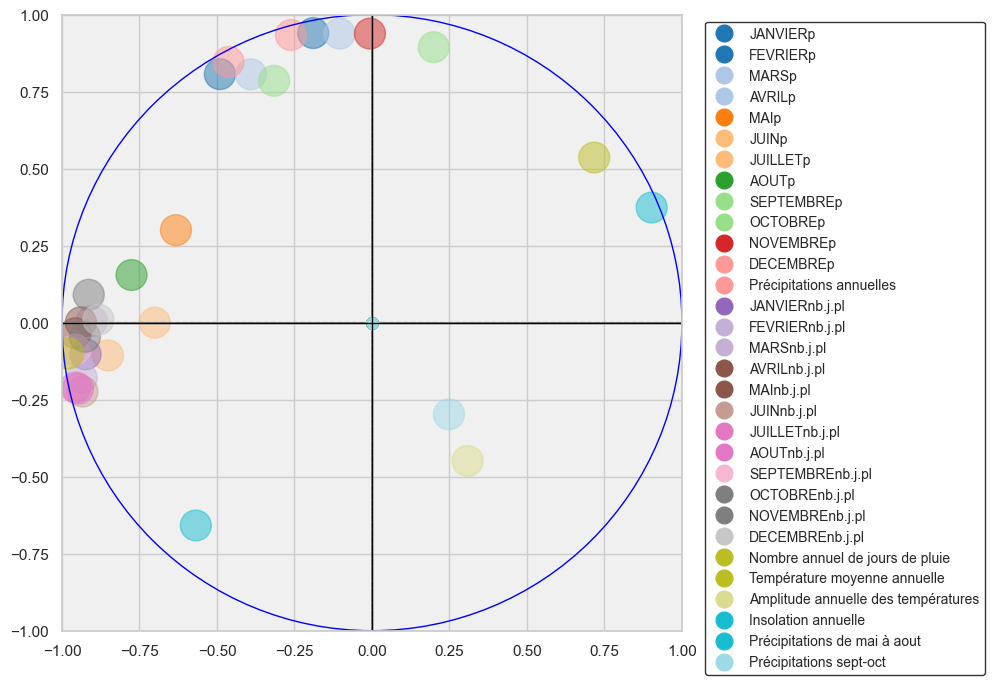

In [57]:
# Cercle des corrélations
fig, axes = plt.subplots(figsize=(8, 8))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.set_facecolor('#f0f0f0')  # Couleur de fond

for j in range(p):
    # Ajouter un cercle pour mettre en évidence la variable
    circle = plt.Circle((corvar[j, 0], corvar[j, 1]), radius=0.05, color=plt.cm.tab20(j/p), fill=True, alpha=0.5)
    axes.add_artist(circle)

# Ajouter les axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Ajouter un cercle
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_artist(cercle)

# Ajouter une légende pour les variables avec ajustement de la taille
for j in range(p):
    plt.plot(0, 0, 'o', color=plt.cm.tab20(j/p), markersize=8, label=data.columns[j])

# Ajouter des axes avec des flèches
axes.arrow(0, -1, 0, 2, head_width=0.05, head_length=0.1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-1, 0, 2, 0, head_width=0.05, head_length=0.1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les individus avec ajustement de la taille
axes.legend(loc='upper right', bbox_to_anchor=(1.5, 1), markerscale=1.5, frameon=True, edgecolor='black', fontsize='small')

# Afficher le graphique
plt.show()

In [58]:
#Qualité de représentation des variables sur les axes
#cosinus carré des variables
cos2var = corvar**2
df_ctr_variables = pandas.DataFrame({'id':data.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})
#Filtrer les variables avec un taux de représentation supérier à la moyenne sur l'axe 1
df_ctr_variables[df_ctr_variables['COS2_1'] > df_ctr_variables['COS2_1'].mean()]

,id,COS2_1,COS2_2
6,JUILLETp,0.725165,0.011281
7,AOUTp,0.601375,0.023973
13,JANVIERnb.j.pl,0.853532,0.010567
14,FEVRIERnb.j.pl,0.876582,0.032031
15,MARSnb.j.pl,0.815922,0.000031
16,AVRILnb.j.pl,0.913862,0.001163
17,MAInb.j.pl,0.881900,0.000002
18,JUINnb.j.pl,0.872203,0.050071
19,JUILLETnb.j.pl,0.914211,0.044233
20,AOUTnb.j.pl,0.899197,0.045873


In [59]:
# Filtrer les variables avec un taux de représentation supérier à la moyenne sur l'axe 2
df_ctr_variables[df_ctr_variables['COS2_2'] > df_ctr_variables['COS2_2'].mean()]

,id,COS2_1,COS2_2
0,JANVIERp,0.240678,0.651205
1,FEVRIERp,0.035888,0.884176
2,MARSp,0.010855,0.880794
3,AVRILp,0.152637,0.650713
8,SEPTEMBREp,0.099680,0.617012
9,OCTOBREp,0.039721,0.800268
10,NOVEMBREp,0.000043,0.881211
11,DECEMBREp,0.068307,0.872358
12,Précipitations annuelles,0.213986,0.716882
26,Température moyenne annuelle,0.514136,0.287478


<h5 style="color:green">REPRESENTATION DES VARIABLES DANS LE DEUXIEME PLAN</h5>

In [68]:
## Contribution des variables aux axes du deuxième plan
ctr = coord**2  

for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*val_p[j])

pandas.DataFrame({'id':data.index,'CR1':ctr[:,0],'CR3':ctr[:,2]}) 

,id,CR1,CR3
0,Ajaccio,0.078363,0.098698
1,Angers,0.000656,0.027359
2,Angoulème,0.006803,0.003471
3,Besançon,0.041321,0.092108
4,Biarritz,0.068225,0.053823
5,Bordeaux,0.009178,0.003696
6,Brest,0.086413,0.080379
7,Caen,0.008777,0.033586
8,Clermont-Fd,0.001677,0.085842
9,Dijon,0.000683,0.020167


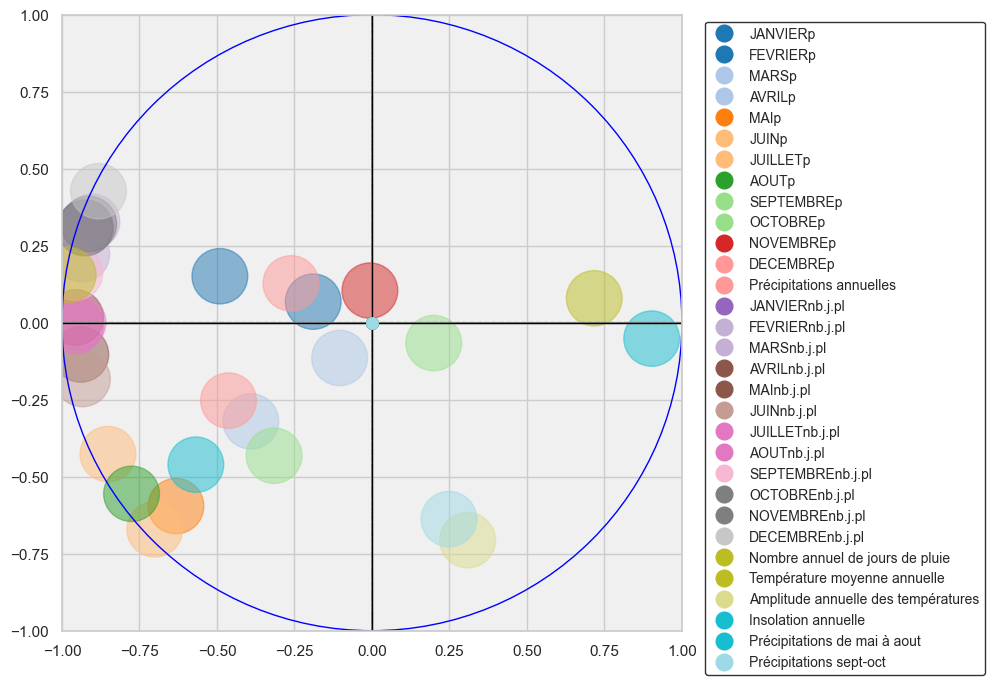

In [63]:
# Cercle des corrélations
fig, axes = plt.subplots(figsize=(8, 8))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.set_facecolor('#f0f0f0')  # Couleur de fond

# Affichage des noms des variables à l'intérieur du cercle avec différentes couleurs
for j in range(p):
    # Ajouter un cercle pour mettre en évidence la variable
    circle = plt.Circle((corvar[j, 0], corvar[j, 2]), radius=0.09, color=plt.cm.tab20(j/p), fill=True, alpha=0.5)
    axes.add_artist(circle)


# Ajouter les axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Ajouter un cercle extérieur
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_artist(cercle)

# Ajouter des axes avec des flèches
axes.arrow(0, -1, 0, 2, head_width=0.05, head_length=0.1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-1, 0, 2, 0, head_width=0.05, head_length=0.1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les variables avec ajustement de la taille
for j in range(p):
    plt.plot(0, 0, 'o', color=plt.cm.tab20(j/p), markersize=8, label=data.columns[j])

# Ajouter une légende pour les individus avec ajustement de la taille
axes.legend(loc='upper right', bbox_to_anchor=(1.5, 1), markerscale=1.5, frameon=True, edgecolor='black', fontsize='small')

# Afficher le graphique
plt.show()


In [64]:
#Qualité de représentation des variables sur les axes
#cosinus carré des variables
cos2var = corvar**2
df_ctr_variables = pandas.DataFrame({'id':data.columns,'COS2_1':cos2var[:,0],'COS2_3':cos2var[:,2]})
df_ctr_variables[df_ctr_variables['COS2_1'] > df_ctr_variables['COS2_1'].mean()]

,id,COS2_1,COS2_3
6,JUILLETp,0.725165,0.181899
7,AOUTp,0.601375,0.308594
13,JANVIERnb.j.pl,0.853532,0.095937
14,FEVRIERnb.j.pl,0.876582,0.049459
15,MARSnb.j.pl,0.815922,0.107595
16,AVRILnb.j.pl,0.913862,0.000295
17,MAInb.j.pl,0.881900,0.010647
18,JUINnb.j.pl,0.872203,0.033413
19,JUILLETnb.j.pl,0.914211,0.000105
20,AOUTnb.j.pl,0.899197,0.000001


In [65]:
df_ctr_variables[df_ctr_variables['COS2_3'] > df_ctr_variables['COS2_3'].mean()]

,id,COS2_1,COS2_3
4,MAIp,0.399723,0.354563
5,JUINp,0.490894,0.450087
6,JUILLETp,0.725165,0.181899
7,AOUTp,0.601375,0.308594
8,SEPTEMBREp,0.099680,0.186447
24,DECEMBREnb.j.pl,0.778227,0.182383
27,Amplitude annuelle des températures,0.095229,0.498573
29,Précipitations de mai à aout,0.322683,0.212395
30,Précipitations sept-oct,0.061696,0.406618


<h5 style="color:green">REPRESENTATION DES VARIABLES DANS LE TROISIEME PLAN</h5>

In [67]:
## Contribution des variables aux axes du 3eme plan
ctr = coord**2  

for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*val_p[j])

pandas.DataFrame({'id':data.index,'CR2':ctr[:,1],'CR3':ctr[:,2]}) 

,id,CR2,CR3
0,Ajaccio,0.011188,0.098698
1,Angers,0.002201,0.027359
2,Angoulème,0.002557,0.003471
3,Besançon,0.019586,0.092108
4,Biarritz,0.306434,0.053823
5,Bordeaux,0.025649,0.003696
6,Brest,0.117423,0.080379
7,Caen,0.002749,0.033586
8,Clermont-Fd,0.072918,0.085842
9,Dijon,0.009792,0.020167


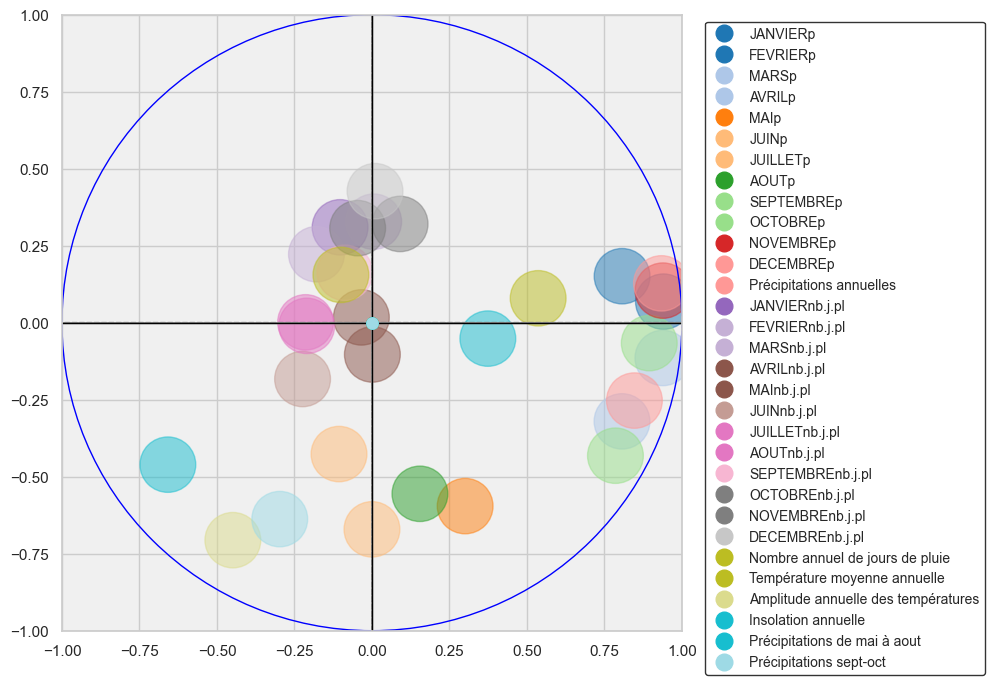

In [69]:
# Cercle des corrélations
fig, axes = plt.subplots(figsize=(8, 8))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.set_facecolor('#f0f0f0')  # Couleur de fond

# Affichage des noms des variables à l'intérieur du cercle avec différentes couleurs
for j in range(p):
    # Ajouter un cercle pour mettre en évidence la variable
    circle = plt.Circle((corvar[j, 1], corvar[j, 2]), radius=0.09, color=plt.cm.tab20(j/p), fill=True, alpha=0.5)
    axes.add_artist(circle)


# Ajouter les axes
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Ajouter un cercle extérieur
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
axes.add_artist(cercle)

# Ajouter des axes avec des flèches
axes.arrow(0, -1, 0, 2, head_width=0.05, head_length=0.1, fc='gray', ec='gray', linestyle='dashed')
axes.arrow(-1, 0, 2, 0, head_width=0.05, head_length=0.1, fc='gray', ec='gray', linestyle='dashed')

# Ajouter des lignes d'axe
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.axvline(0, color='black', linestyle='-', linewidth=1)

# Ajouter une légende pour les variables avec ajustement de la taille
for j in range(p):
    plt.plot(0, 0, 'o', color=plt.cm.tab20(j/p), markersize=8, label=data.columns[j])

# Ajouter une légende pour les individus avec ajustement de la taille
axes.legend(loc='upper right', bbox_to_anchor=(1.5, 1), markerscale=1.5, frameon=True, edgecolor='black', fontsize='small')

# Afficher le graphique
plt.show()

In [71]:
#Qualité de représentation des variables sur les axes
#cosinus carré des variables
cos2var = corvar**2
df_ctr_variables = pandas.DataFrame({'id':data.columns,'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2]})
df_ctr_variables[df_ctr_variables['COS2_2'] > df_ctr_variables['COS2_2'].mean()]

,id,COS2_2,COS2_3
0,JANVIERp,0.651205,0.022792
1,FEVRIERp,0.884176,0.004683
2,MARSp,0.880794,0.013102
3,AVRILp,0.650713,0.102618
8,SEPTEMBREp,0.617012,0.186447
9,OCTOBREp,0.800268,0.004384
10,NOVEMBREp,0.881211,0.010855
11,DECEMBREp,0.872358,0.016308
12,Précipitations annuelles,0.716882,0.063914
26,Température moyenne annuelle,0.287478,0.006281


In [72]:
df_ctr_variables[df_ctr_variables['COS2_3'] > df_ctr_variables['COS2_3'].mean()]

,id,COS2_2,COS2_3
4,MAIp,9.037391e-02,0.354563
5,JUINp,3.396787e-09,0.450087
6,JUILLETp,1.128149e-02,0.181899
7,AOUTp,2.397264e-02,0.308594
8,SEPTEMBREp,6.170124e-01,0.186447
24,DECEMBREnb.j.pl,9.912722e-05,0.182383
27,Amplitude annuelle des températures,2.013332e-01,0.498573
29,Précipitations de mai à aout,4.334056e-01,0.212395
30,Précipitations sept-oct,8.843190e-02,0.406618
